In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.impute import KNNImputer

In [4]:
df = pd.read_csv(r'credit_risk_dataset.csv')
df.head()

,person_age,person_income,person_home_ownership,person_emp_length,loan_intent,loan_grade,loan_amnt,loan_int_rate,loan_status,loan_percent_income,cb_person_default_on_file,cb_person_cred_hist_length
0,22,59000,RENT,123.0,PERSONAL,D,35000,16.02,1,0.59,Y,3
1,21,9600,OWN,5.0,EDUCATION,B,1000,11.14,0,0.10,N,2
2,25,9600,MORTGAGE,1.0,MEDICAL,C,5500,12.87,1,0.57,N,3
3,23,65500,RENT,4.0,MEDICAL,C,35000,15.23,1,0.53,N,2
4,24,54400,RENT,8.0,MEDICAL,C,35000,14.27,1,0.55,Y,4


In [5]:
df.tail()

,person_age,person_income,person_home_ownership,person_emp_length,loan_intent,loan_grade,loan_amnt,loan_int_rate,loan_status,loan_percent_income,cb_person_default_on_file,cb_person_cred_hist_length
32576,57,53000,MORTGAGE,1.0,PERSONAL,C,5800,13.16,0,0.11,N,30
32577,54,120000,MORTGAGE,4.0,PERSONAL,A,17625,7.49,0,0.15,N,19
32578,65,76000,RENT,3.0,HOMEIMPROVEMENT,B,35000,10.99,1,0.46,N,28
32579,56,150000,MORTGAGE,5.0,PERSONAL,B,15000,11.48,0,0.10,N,26
32580,66,42000,RENT,2.0,MEDICAL,B,6475,9.99,0,0.15,N,30


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32581 entries, 0 to 32580
Data columns (total 12 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   person_age                  32581 non-null  int64  
 1   person_income               32581 non-null  int64  
 2   person_home_ownership       32581 non-null  object 
 3   person_emp_length           31686 non-null  float64
 4   loan_intent                 32581 non-null  object 
 5   loan_grade                  32581 non-null  object 
 6   loan_amnt                   32581 non-null  int64  
 7   loan_int_rate               29465 non-null  float64
 8   loan_status                 32581 non-null  int64  
 9   loan_percent_income         32581 non-null  float64
 10  cb_person_default_on_file   32581 non-null  object 
 11  cb_person_cred_hist_length  32581 non-null  int64  
dtypes: float64(3), int64(5), object(4)
memory usage: 3.0+ MB


Null values appear to be present in person_emp_length column & loan_int_rate

In [7]:
df.shape

(32581, 12)

In [8]:
df.describe()

,person_age,person_income,person_emp_length,loan_amnt,loan_int_rate,loan_status,loan_percent_income,cb_person_cred_hist_length
count,32581.000000,3.258100e+04,31686.000000,32581.000000,29465.000000,32581.000000,32581.000000,32581.000000
mean,27.734600,6.607485e+04,4.789686,9589.371106,11.011695,0.218164,0.170203,5.804211
std,6.348078,6.198312e+04,4.142630,6322.086646,3.240459,0.413006,0.106782,4.055001
min,20.000000,4.000000e+03,0.000000,500.000000,5.420000,0.000000,0.000000,2.000000
25%,23.000000,3.850000e+04,2.000000,5000.000000,7.900000,0.000000,0.090000,3.000000
50%,26.000000,5.500000e+04,4.000000,8000.000000,10.990000,0.000000,0.150000,4.000000
75%,30.000000,7.920000e+04,7.000000,12200.000000,13.470000,0.000000,0.230000,8.000000
max,144.000000,6.000000e+06,123.000000,35000.000000,23.220000,1.000000,0.830000,30.000000


Someone appears to be 144 years old in the dataset but with 75% being between 20 and 30. Someones employment length also is 123 years (sounds a bit odd). 

In [9]:
# Checking for duplicates
print(df.duplicated().sum())

165


In [10]:
# Dropping the found duplicates
df.drop_duplicates(inplace=True)

In [11]:
# Checking the number of missing values
df.isna().sum()

person_age                       0
person_income                    0
person_home_ownership            0
person_emp_length              887
loan_intent                      0
loan_grade                       0
loan_amnt                        0
loan_int_rate                 3095
loan_status                      0
loan_percent_income              0
cb_person_default_on_file        0
cb_person_cred_hist_length       0
dtype: int64

In [12]:
# Imputing the missing values with the mean
df['loan_int_rate'] = df['loan_int_rate'].fillna(df['loan_int_rate'].mean())

# EDA

In [13]:
df['loan_status'].value_counts()

loan_status
0    25327
1     7089
Name: count, dtype: int64

Large imbalance in the target variable

In [14]:
target = 'loan_status'
categorical_features = df.select_dtypes(include='object').columns.tolist()
numerical_features = df.select_dtypes(include=['int64', 'float64']).columns.tolist()

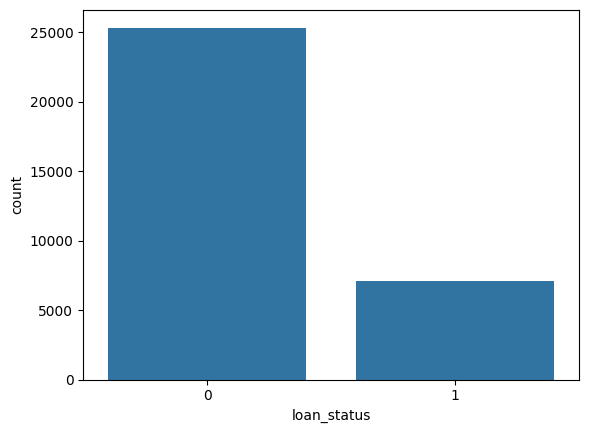

In [15]:
sns.countplot(df, x=target)
plt.show()

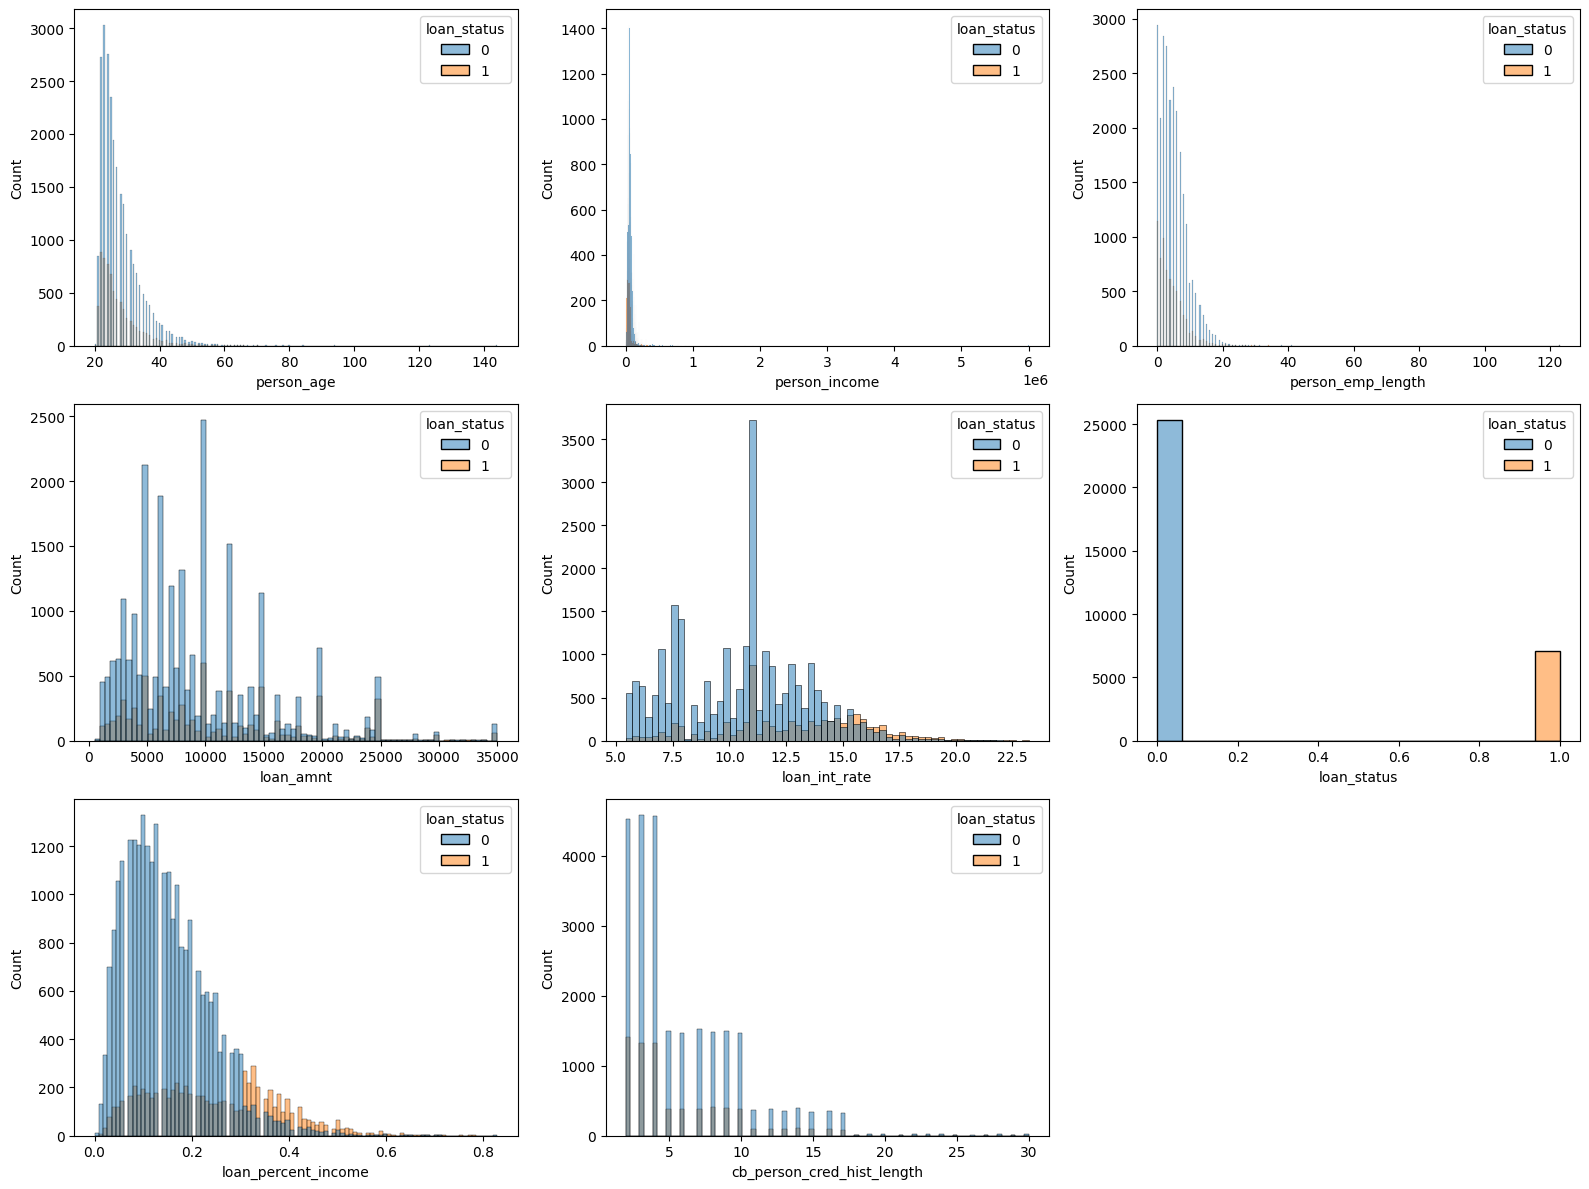

In [16]:
# Distribution of numerical features
plt.figure(figsize=(16.,12))

for i, col in enumerate(numerical_features):
    plt.subplot(3,3,i+1)
    sns.histplot(df, x=col, hue=target)

plt.tight_layout()
plt.show()

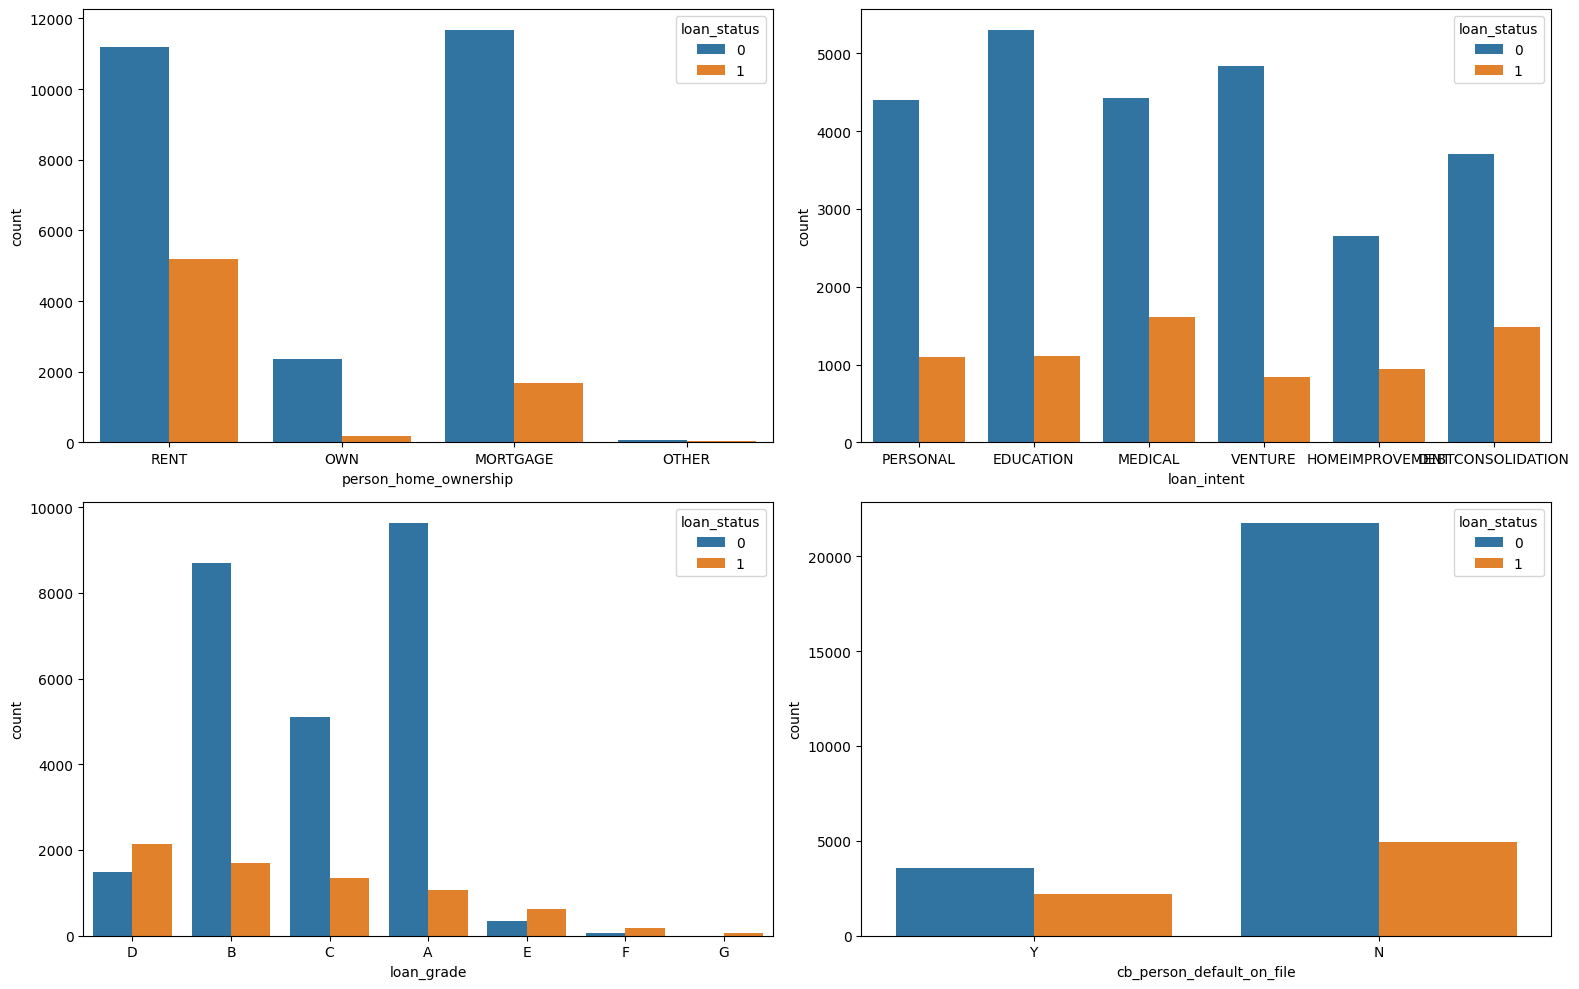

In [17]:
plt.figure(figsize=(16, 10))

for i, col in enumerate(categorical_features):
    plt.subplot(2, 2, i+1)
    sns.countplot(df, x=col, hue=target)

plt.tight_layout()
plt.show()

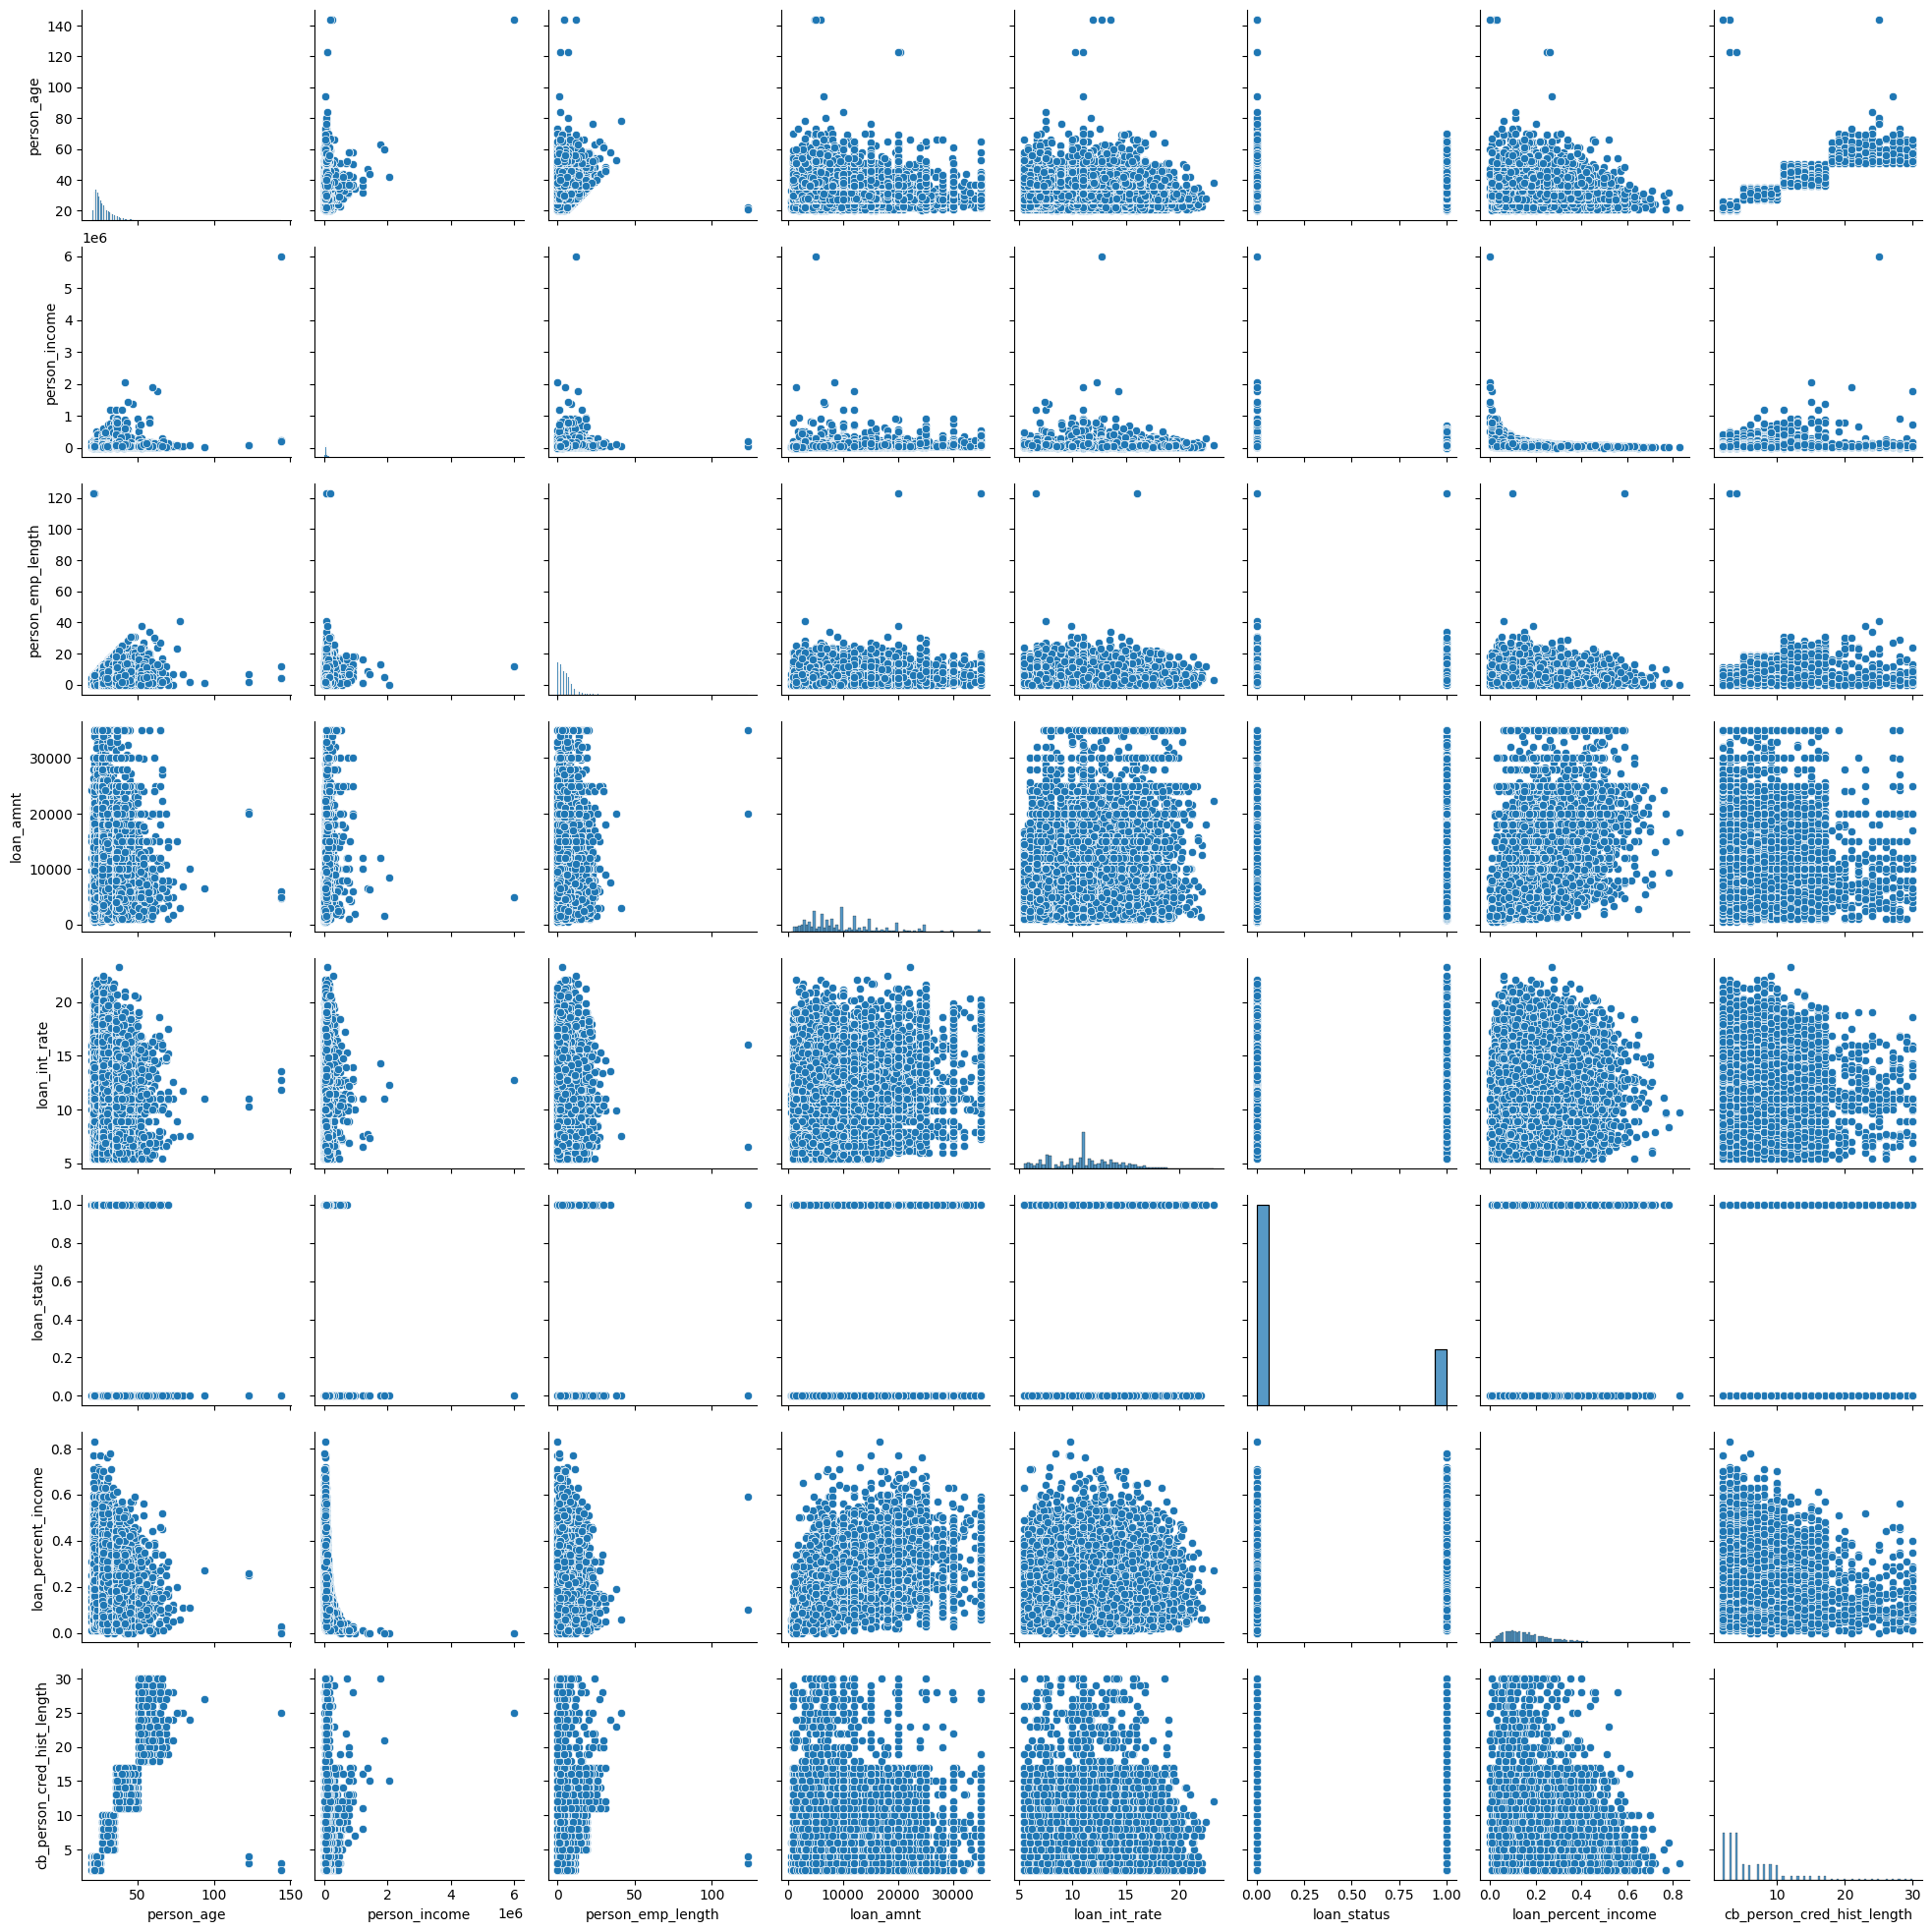

In [18]:
# Pairplot for numerical features
sns.pairplot(df[numerical_features])
plt.show()

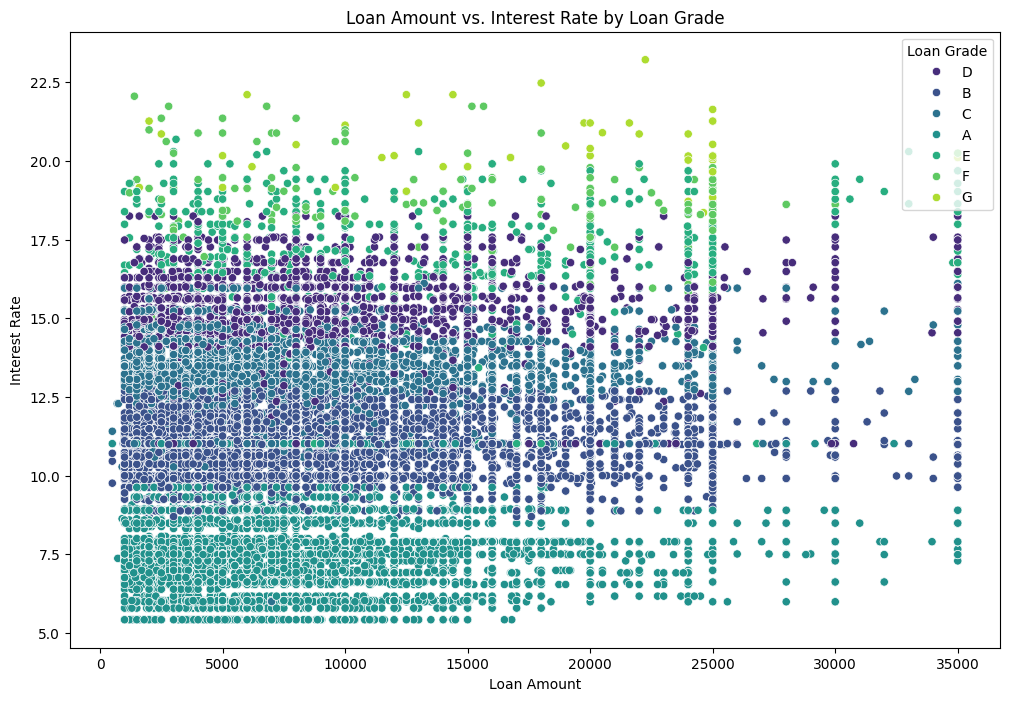

In [19]:
# Loan Amount vs. Interest Rate by Loan Grade
plt.figure(figsize=(12, 8))
sns.scatterplot(data=df, x='loan_amnt', y='loan_int_rate', hue='loan_grade', palette='viridis')
plt.title('Loan Amount vs. Interest Rate by Loan Grade')
plt.xlabel('Loan Amount')
plt.ylabel('Interest Rate')
plt.legend(title='Loan Grade')
plt.show()

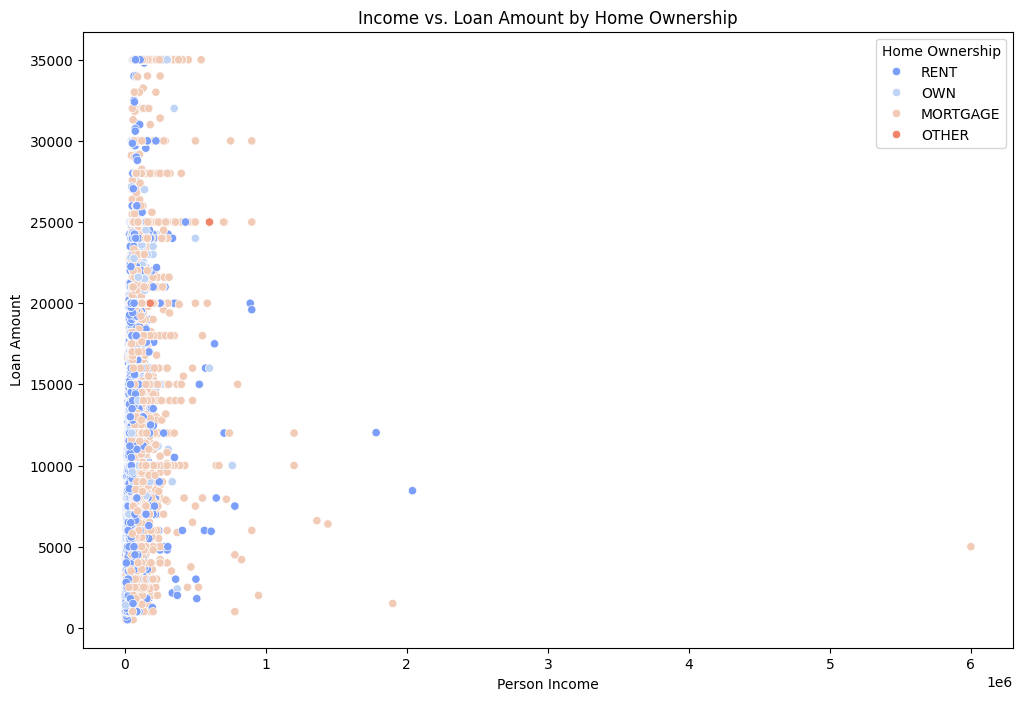

In [20]:
# Income vs. Loan Amount by Home Ownership
plt.figure(figsize=(12, 8))
sns.scatterplot(data=df, x='person_income', y='loan_amnt', hue='person_home_ownership', palette='coolwarm')
plt.title('Income vs. Loan Amount by Home Ownership')
plt.xlabel('Person Income')
plt.ylabel('Loan Amount')
plt.legend(title='Home Ownership')
plt.show()

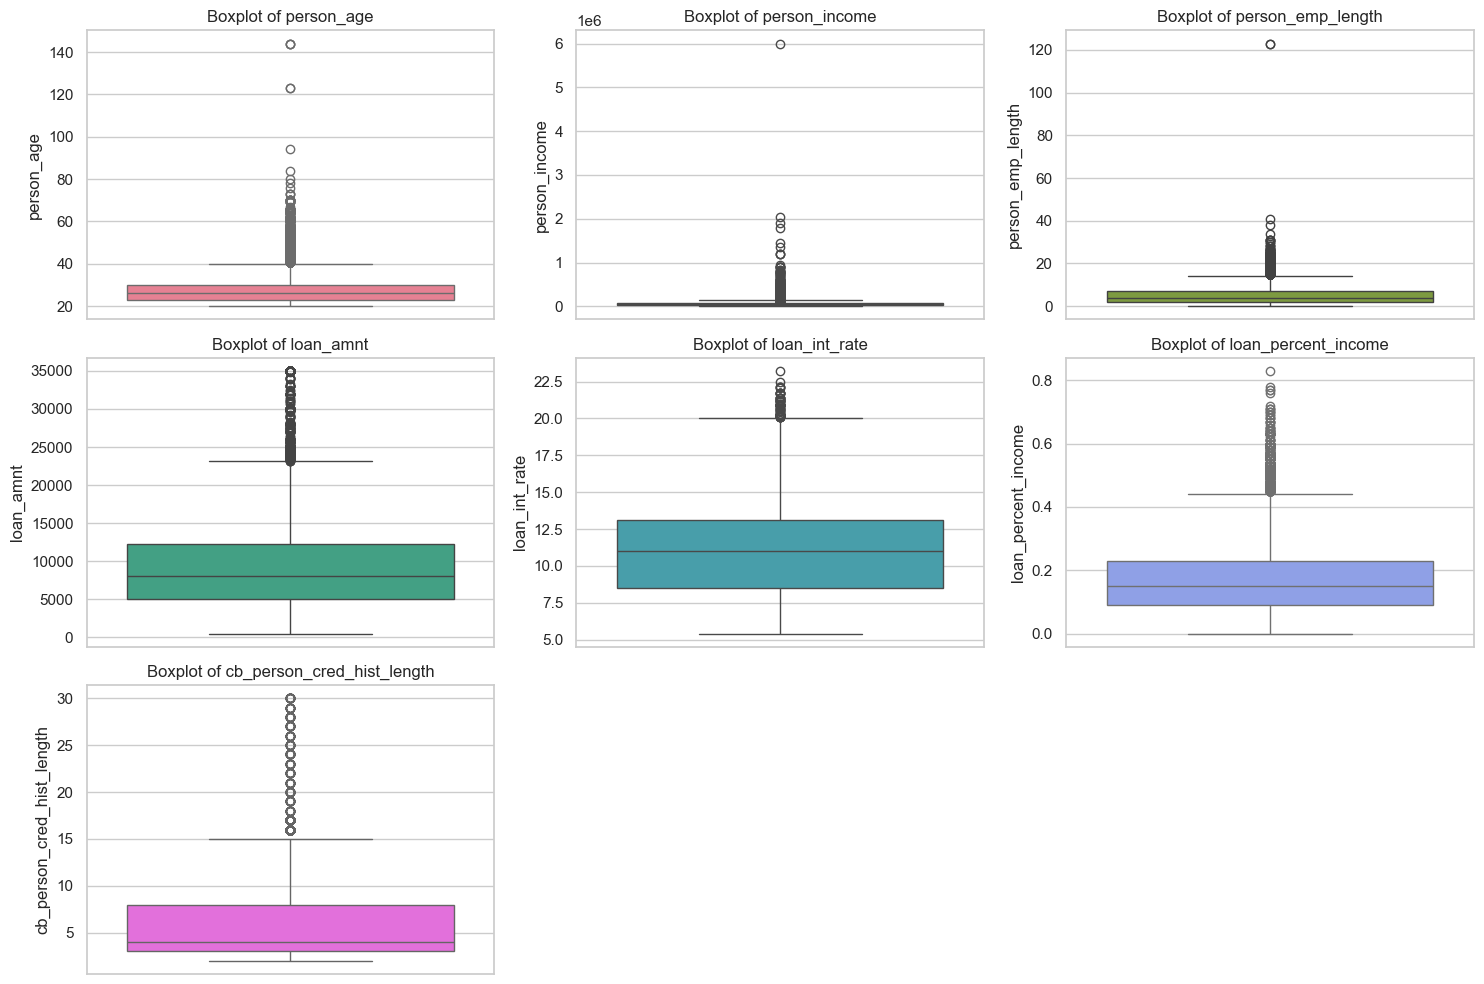

In [21]:
columns = [
    'person_age',
    'person_income',
    'person_emp_length',
    'loan_amnt',
    'loan_int_rate',
    'loan_percent_income',
    'cb_person_cred_hist_length'
]

#Set the style
sns.set(style="whitegrid")

# Define a list of colours for the boxplots
colours = sns.color_palette("husl", len(columns))

# Set up the matplotlib figure
plt.figure(figsize=(15, 10))

# Create a boxplot for each column with a different colour
for i, (column, colour) in enumerate(zip(columns, colours), 1):
    plt.subplot(3, 3, i)
    sns.boxplot(y=df[column], color=colour)
    plt.title(f'Boxplot of {column}')
    plt.tight_layout()

# Show the plots
plt.show()

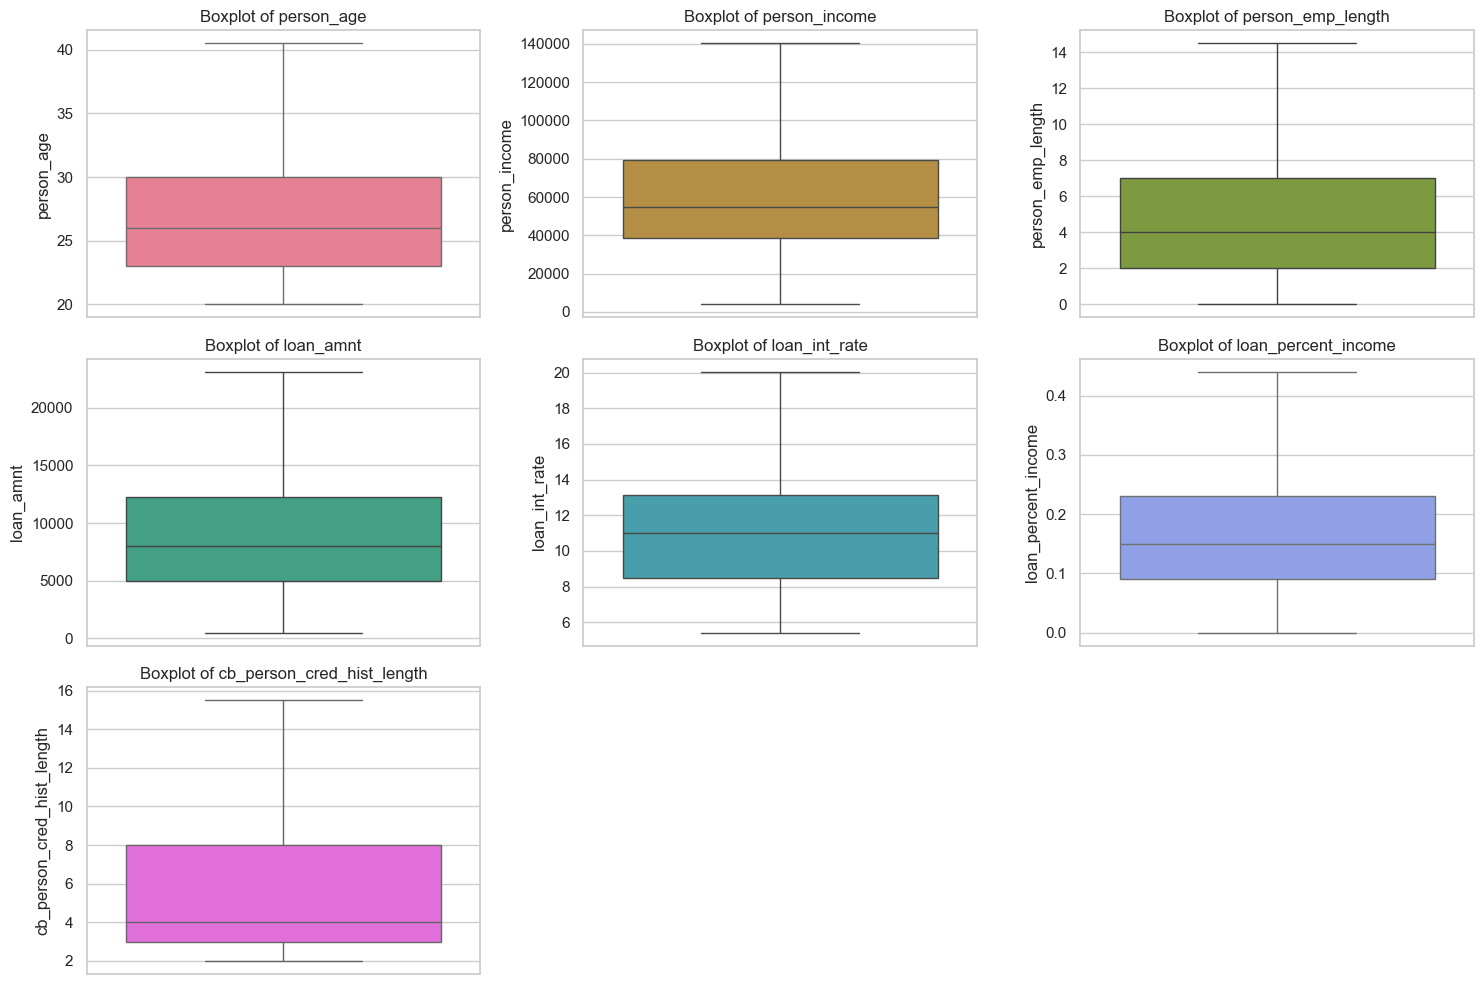

In [22]:
# List of columns to create boxplots for
columns = [
    'person_age',
    'person_income',
    'person_emp_length',
    'loan_amnt',
    'loan_int_rate',
    'loan_percent_income',
    'cb_person_cred_hist_length'
]

# Function to remove outliers
def remove_outliers(series):
    Q1 = series.quantile(0.25)
    Q3 = series.quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    return series.clip(lower=lower_bound, upper=upper_bound)

# Apply the function to remove outliers for each column
for column in columns:
    df[column] = remove_outliers(df[column])

# Set the style of the plots
sns.set(style="whitegrid")

# Define a list of colours for the boxplots
colours = sns.color_palette("husl", len(columns))

# Set up the matplotlib figure
plt.figure(figsize=(15, 10))

# Create a boxplot for each column with a different colour
for i, (column, colour) in enumerate(zip(columns, colours), 1):
    plt.subplot(3, 3, i)
    sns.boxplot(y=df[column], color=colour)
    plt.title(f'Boxplot of {column}')
    plt.tight_layout()

# Show the plots
plt.show()

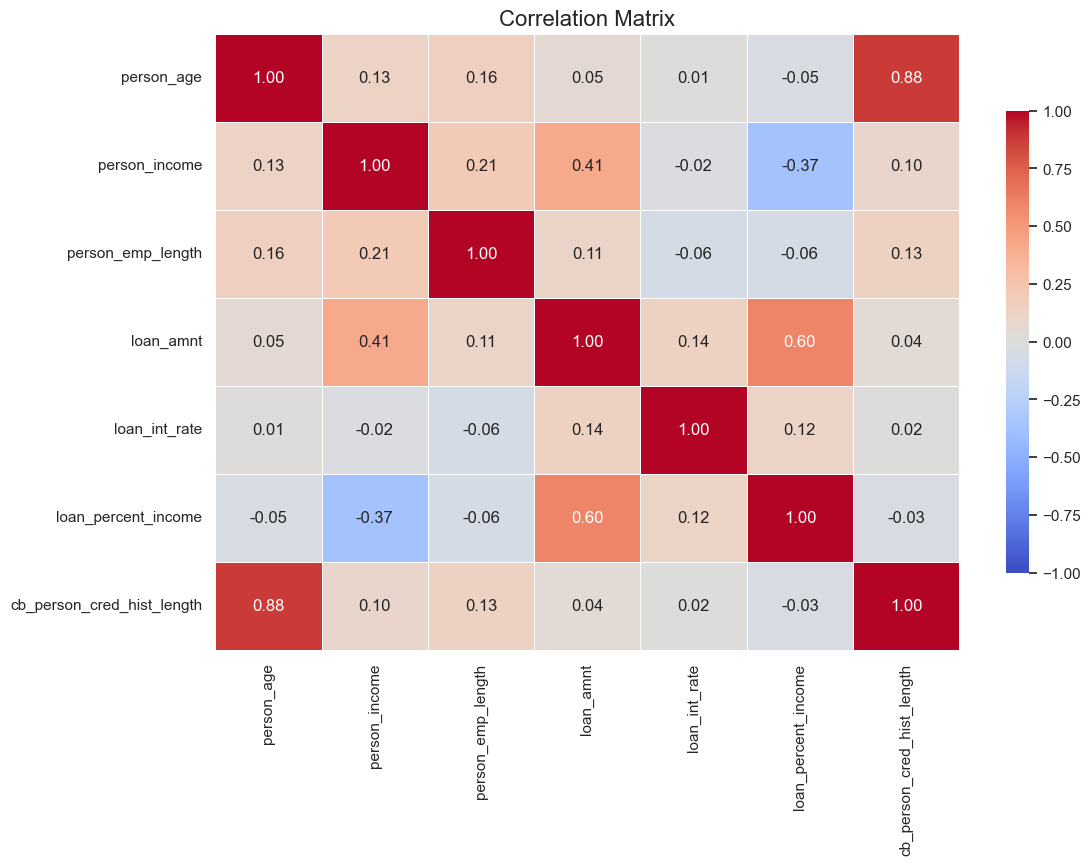

In [23]:
# Calculate the correlation matrix
correlation_matrix = df[columns].corr()

# Set up the matplotlib figure
plt.figure(figsize=(12, 8))

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap='coolwarm', vmin=-1, vmax=1, center=0, 
            linewidths=.5, cbar_kws={"shrink": .75})

# Set the title
plt.title('Correlation Matrix', fontsize=16)

# Show the plot
plt.show()

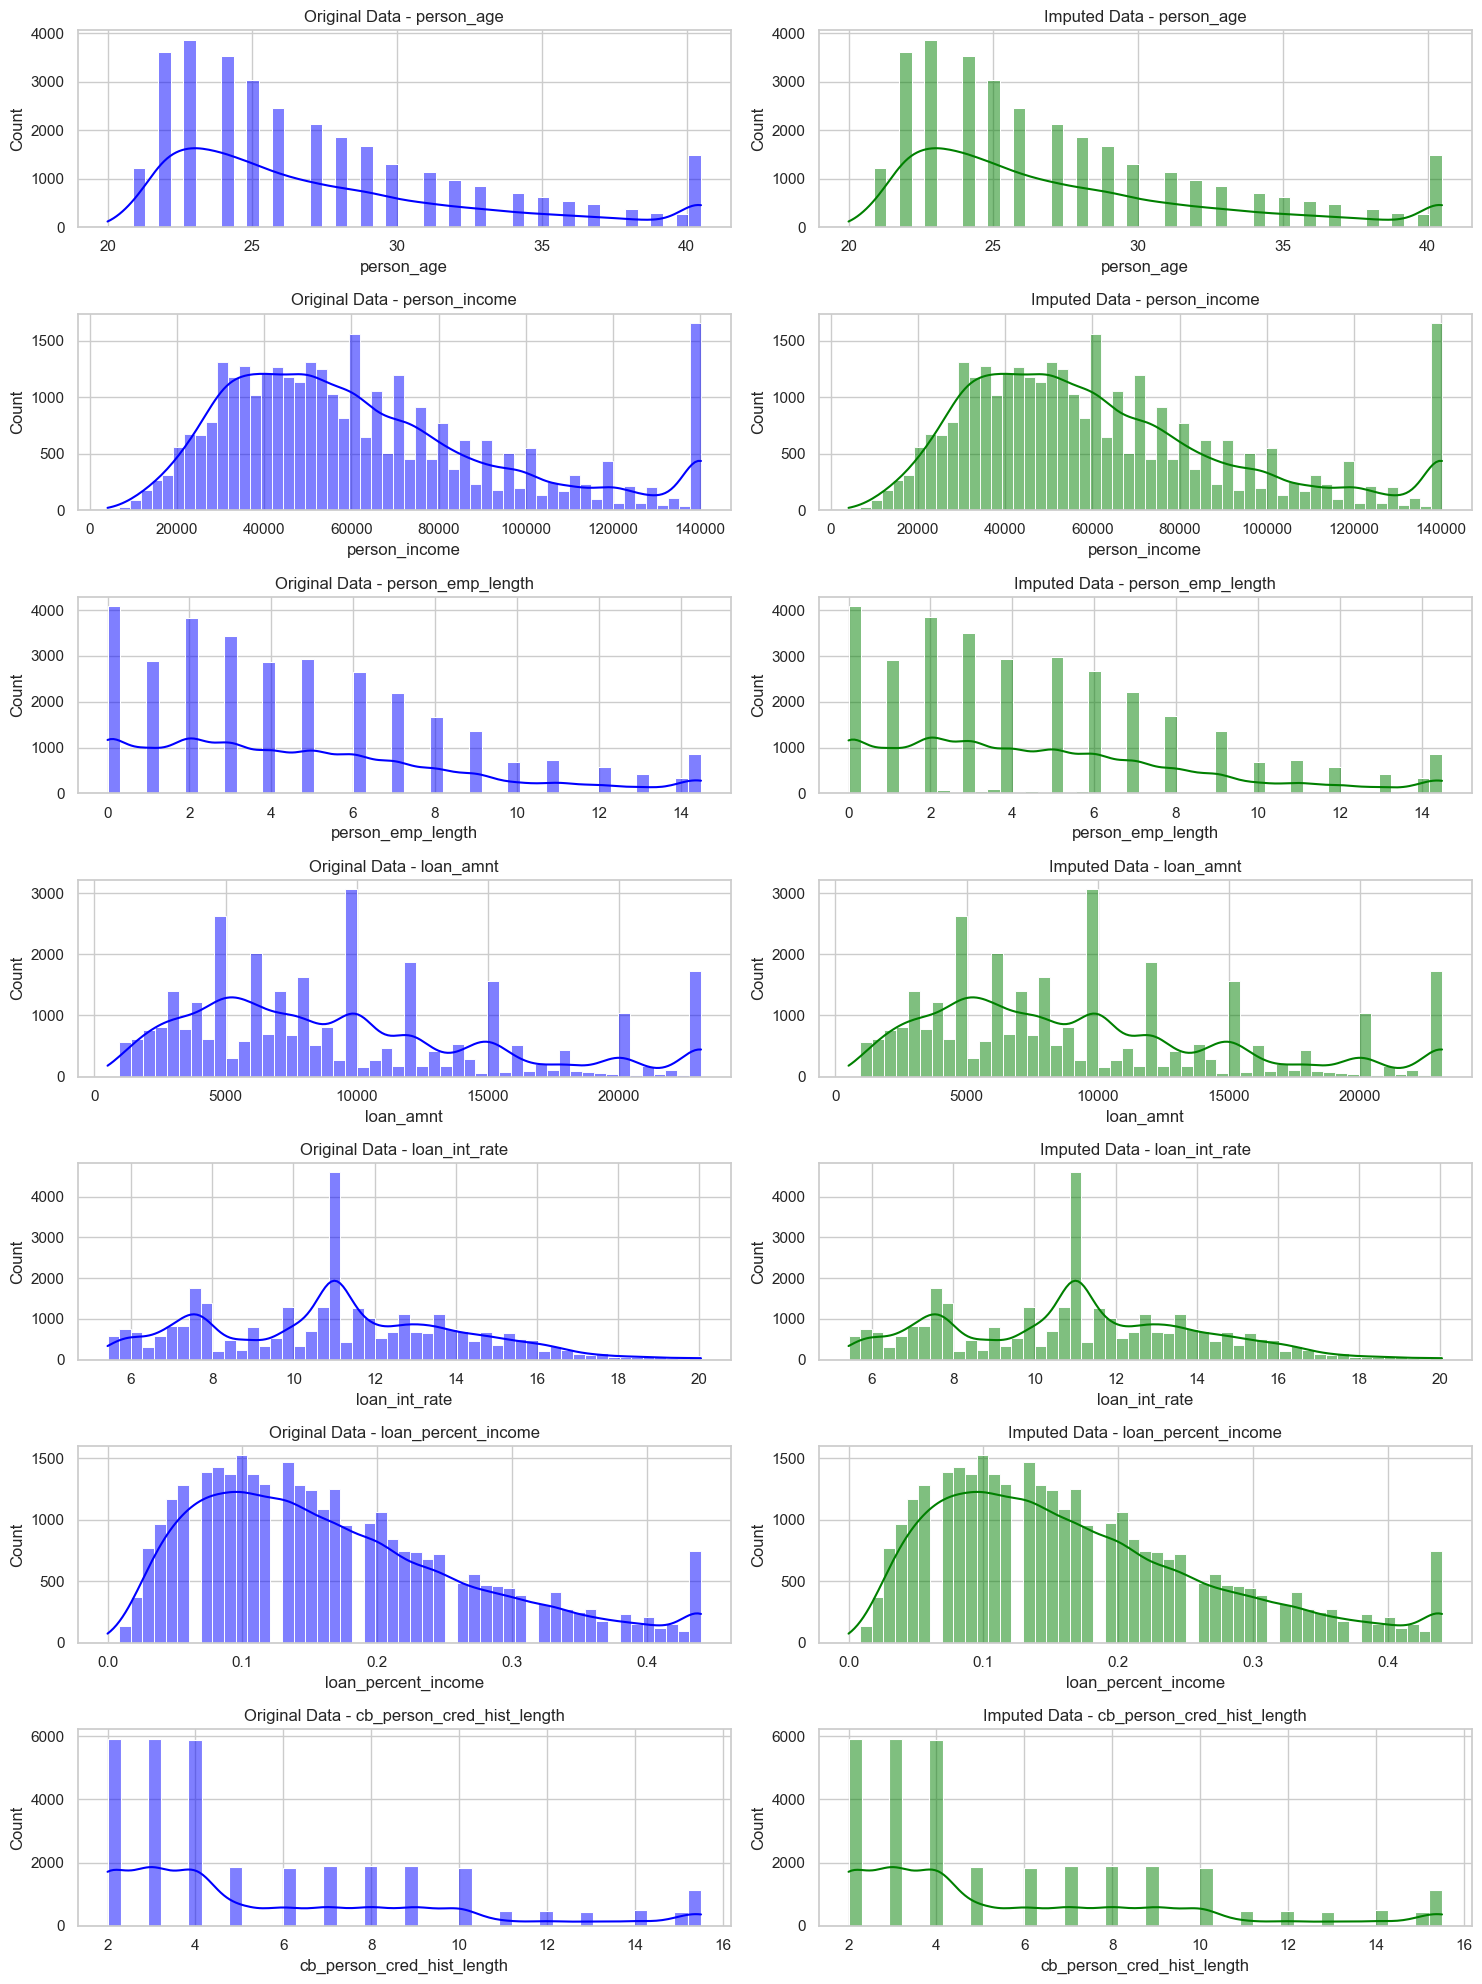

In [24]:
# Select only the columns to impute
data_to_impute = df[columns]

# Initialise the KNNImputer function with 5 neighbours
knn_imputer = KNNImputer(n_neighbors=5)

# Fit and transform the data to impute missing values
imputed_data = knn_imputer.fit_transform(data_to_impute)

# Create a new DataFrame with the imputed data
df_imputed = pd.DataFrame(imputed_data, columns=columns)

# Plotting the original and imputed data
plt.figure(figsize=(15, 20))

for i, column in enumerate(columns, 1):
    plt.subplot(len(columns), 2, 2*i-1)
    sns.histplot(df[column], kde=True, color='blue')
    plt.title(f'Original Data - {column}')
    
    plt.subplot(len(columns), 2, 2*i)
    sns.histplot(df_imputed[column], kde=True, color='green')
    plt.title(f'Imputed Data - {column}')

plt.tight_layout()
plt.show()

In [25]:
categorical_columns = ['person_home_ownership', 'loan_intent', 'loan_grade', 'cb_person_default_on_file']
# Convert categorical variables to numeric using one-hot encoding

df_encoded = pd.get_dummies(df, columns=categorical_columns, drop_first=False)

# Filter values we rationalised as incorrect or unreasonable (too old, too high income)
outlier_indices = df_encoded[(df_encoded['person_age'] == 100) |
                             (df_encoded['person_income'] > 500000) |
                             (df_encoded['person_emp_length'] > 90)].index.tolist()

In [26]:
cleaned_df = df_encoded.drop(index=outlier_indices)

# Calculate correlation matrix after outliers are dropped
correlation_matrix = df_encoded.corr()


Text(0, 0.5, 'Frequency')

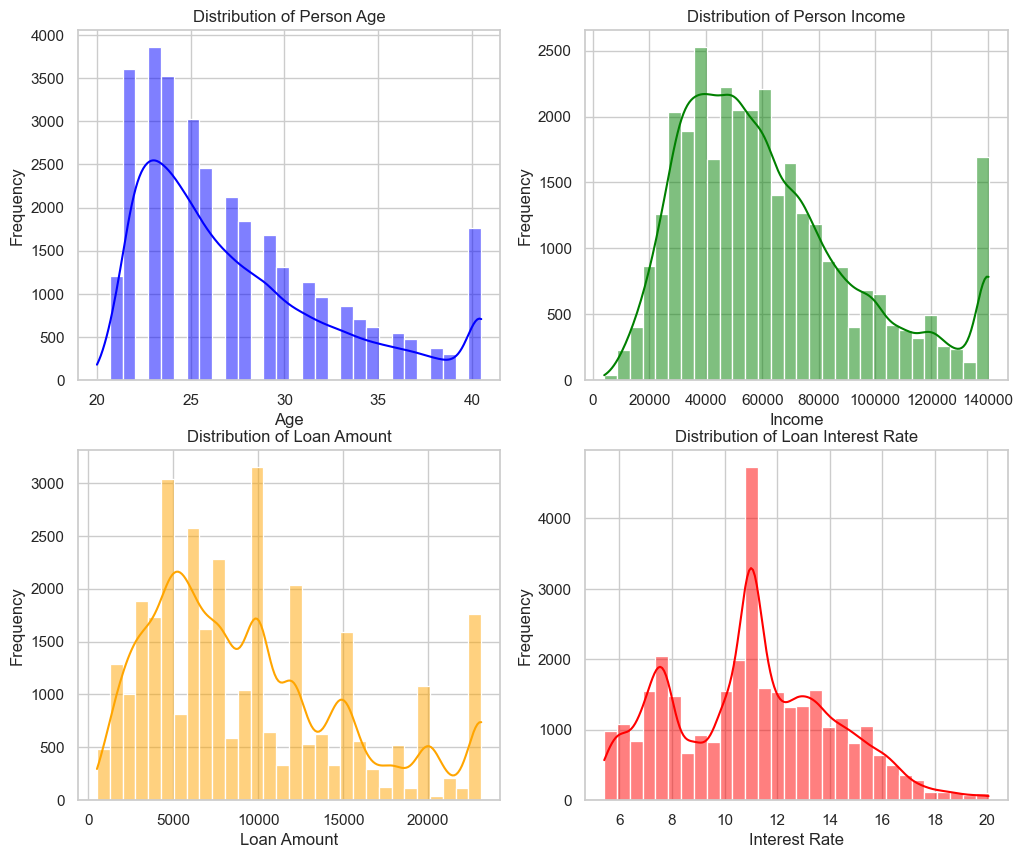

In [32]:
# Set the style for the plots
sns.set(style='whitegrid')

# Create a figure with subplots for each variable
fig, axs = plt.subplots(2, 2, figsize=(12, 10))

# Histogram for person_age
sns.histplot(df_encoded['person_age'], bins=30, kde=True, ax=axs[0, 0], color='blue')
axs[0, 0].set_title('Distribution of Person Age')
axs[0, 0].set_xlabel('Age')
axs[0, 0].set_ylabel('Frequency')

# Histogram for person_income
sns.histplot(df_encoded['person_income'], bins=30, kde=True, ax=axs[0, 1], color='green')
axs[0, 1].set_title('Distribution of Person Income')
axs[0, 1].set_xlabel('Income')
axs[0, 1].set_ylabel('Frequency')

# Histogram for loan_amnt
sns.histplot(df_encoded['loan_amnt'], bins=30, kde=True, ax=axs[1, 0], color='orange')
axs[1, 0].set_title('Distribution of Loan Amount')
axs[1, 0].set_xlabel('Loan Amount')
axs[1, 0].set_ylabel('Frequency')

# Histogram for loan_int_rate
sns.histplot(df_encoded['loan_int_rate'], bins=30, kde=True, ax=axs[1, 1], color='red')
axs[1, 1].set_title('Distribution of Loan Interest Rate')
axs[1, 1].set_xlabel('Interest Rate')
axs[1, 1].set_ylabel('Frequency')